# Data Acquisition

### Imports

In [66]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pydataset
import acquire
import sklearn.model_selection

from env import get_db_url

### Exercises

1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

    - print the first 3 rows
    - print the number of rows and columns (shape)
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris = pydataset.data("iris")

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

    - assign the first 100 rows to a new dataframe, df_excel_sample
    - print the number of rows of your original dataframe
    - print the first 5 column names
    - print the column names that have a data type of object
    - compute the range for each of the numeric variables.

In [8]:
xls = pd.ExcelFile("Spreadsheets_Exercises.xlsx")
df_excel = pd.read_excel(xls, "Table1_CustDetails")

In [9]:
df_excel_sample  = df_excel.head(100)

In [10]:
df_excel_sample.shape

(100, 12)

In [11]:
df_excel.shape[0]

7049

In [12]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [13]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

In [14]:
int_max = df_excel.select_dtypes(include='int64').max()
int_min = df_excel.select_dtypes(include='int64').min()
int_max - int_min

is_senior_citizen    1
phone_service        2
internet_service     2
contract_type        2
dtype: int64

In [15]:
float_max = df_excel.select_dtypes(include='float64').max()
float_min = df_excel.select_dtypes(include='float64').min()
float_max - float_min

monthly_charges     100.5
total_charges      8666.0
dtype: float64

3. Read the data from this google sheet into a dataframe, df_google

    - print the first 3 rows
    - print the number of rows and columns
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables
    - print the unique values for each of your categorical variables

In [16]:
sheet_url = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [17]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
df_google.shape

(891, 12)

In [19]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df_google.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [23]:
df_google.select_dtypes(include='object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [24]:
df_google.select_dtypes(include='object')

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [25]:
#get_titanic_data 

In [26]:
sheet_url = "https://docs.google.com/spreadsheets/d/1PmmRUXgmQ6oO9fLORG4oeMLe_mzIWlFAkJKA2cwLOLg/edit#gid=935554057"

In [27]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [28]:
df_titanic = pd.read_csv(csv_export_url)

In [29]:
def get_titanic_data():
    sheet_url = "https://docs.google.com/spreadsheets/d/1PmmRUXgmQ6oO9fLORG4oeMLe_mzIWlFAkJKA2cwLOLg/edit#gid=935554057"
    csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    df_titanic = pd.read_csv(csv_export_url)
    return df_titanic

In [30]:
titanic = acquire.get_titanic_data()

In [31]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [32]:
def get_iris_data():
    url = get_db_url("iris_db")
    query = """SELECT * 
    FROM measurements
    JOIN species USING(species_id);"""
    df = pd.read_sql(query, url)
    return df

In [33]:
df = acquire.get_iris_data()

In [34]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


# Exploratory Analysis

Use the iris dataset.

1. Split data into train (70%) & test (30%) samples.

In [36]:
iris = acquire.get_iris_data()

In [39]:
train, test = sklearn.model_selection.train_test_split(iris, train_size=.7, random_state=123)

In [42]:
train.dtypes

species_id          int64
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_name       object
dtype: object

In [43]:
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
114,3,115,5.8,2.8,5.1,2.4,virginica
136,3,137,6.3,3.4,5.6,2.4,virginica
53,2,54,5.5,2.3,4.0,1.3,versicolor
19,1,20,5.1,3.8,1.5,0.3,setosa
38,1,39,4.4,3.0,1.3,0.2,setosa


In [44]:
train.shape

(105, 7)

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# "Melt" the dataset to "long-form" representation
subset = train[["sepal_length", "sepal_width", "petal_length", "petal_width", "species_name"]]


In [54]:
subset.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
114,5.8,2.8,5.1,2.4,virginica
136,6.3,3.4,5.6,2.4,virginica
53,5.5,2.3,4.0,1.3,versicolor
19,5.1,3.8,1.5,0.3,setosa
38,4.4,3.0,1.3,0.2,setosa


In [55]:
melt = pd.melt(subset, "species_name", var_name="measurement")

In [56]:
melt

,species_name,measurement,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4
...,...,...,...
415,setosa,petal_width,0.3
416,versicolor,petal_width,1.1
417,versicolor,petal_width,1.5
418,virginica,petal_width,1.8


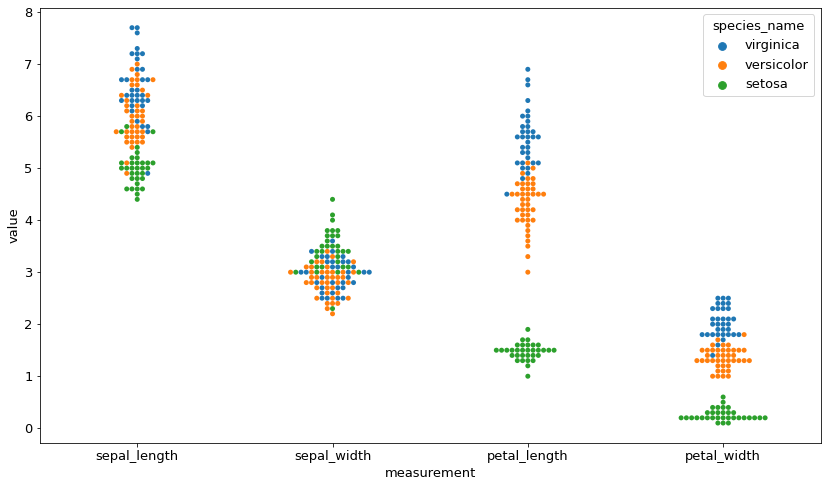

In [61]:

plt.rc('figure', figsize=(14, 8))
plt.rc('font', size=13)
sns.swarmplot(x="measurement", y="value", hue="species_name", data=melt)


Takeaways: petal lengtths seem to be good indicaters of the species as do the petal width

3. Create 4 subplots (2 rows x 2 columns) of scatterplots
    - sepal_length x sepal_width
    - petal_length x petal_width
    - sepal_area x petal_area
    - sepal_length x petal_length
    
Make your figure size 14 x 8. What are your takeaways?

In [93]:
train["sepal_area"] = train.sepal_length * train.sepal_width

In [94]:
subset["sepal_area"] = train.sepal_length * train.sepal_width

In [95]:
train.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
114,3,115,5.8,2.8,5.1,2.4,virginica,16.24,12.24
136,3,137,6.3,3.4,5.6,2.4,virginica,21.42,13.44


In [96]:
train["petal_area"] = train.petal_length * train.petal_width 

In [97]:
subset["petal_area"] = train.petal_length * train.petal_width 

In [98]:
train.head(2)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
114,3,115,5.8,2.8,5.1,2.4,virginica,16.24,12.24
136,3,137,6.3,3.4,5.6,2.4,virginica,21.42,13.44


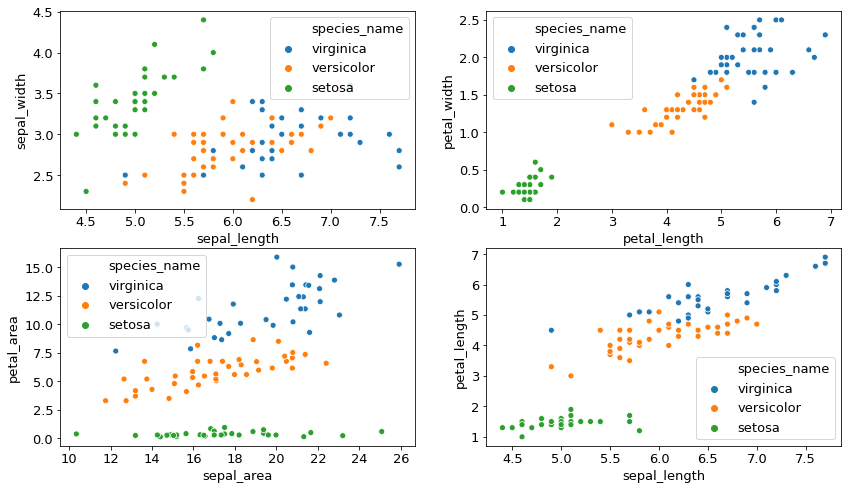

In [99]:
plt.subplot(2, 2, 1)
sns.scatterplot(x="sepal_length", y="sepal_width", data=train, hue="species_name")

plt.subplot(2, 2, 2)
sns.scatterplot(x="petal_length", y="petal_width", data=train, hue="species_name")

plt.subplot(2, 2, 3)
sns.scatterplot(x="sepal_area", y="petal_area", data=train, hue="species_name")

plt.subplot(2, 2, 4)
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species_name")

Takeaways: Setosa seems to be easily identifiable by all combinations. versicolot and virginica are closer realted when it come to sepal width and length

4. Create a heatmap of each variable layering correlation coefficient on top.

Text(0.5, 1.0, 'Correlation to one another')

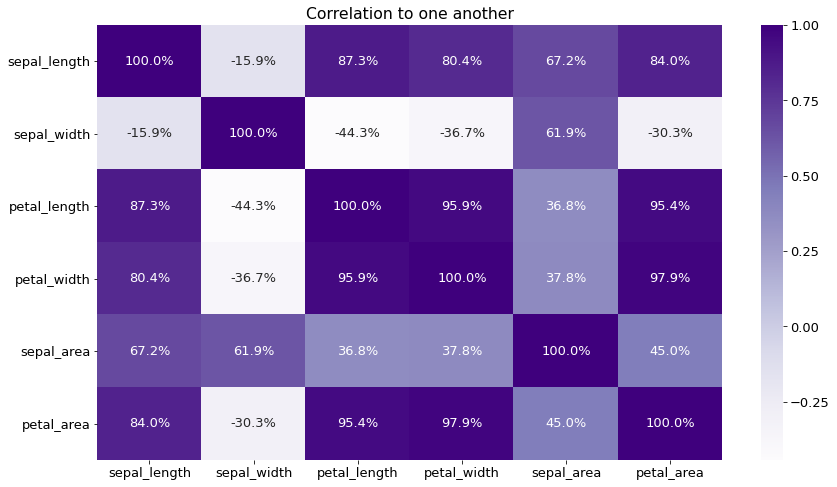

In [100]:
sns.heatmap(subset.corr(), annot=True, cmap="Purples", fmt='.1%')
plt.title("Correlation to one another")

Takeaways: Petal length and sepal lenght are closeeley correlated, petal width and length are extremely correlated

5. Create a scatter matrix visualizing the interaction of each variable

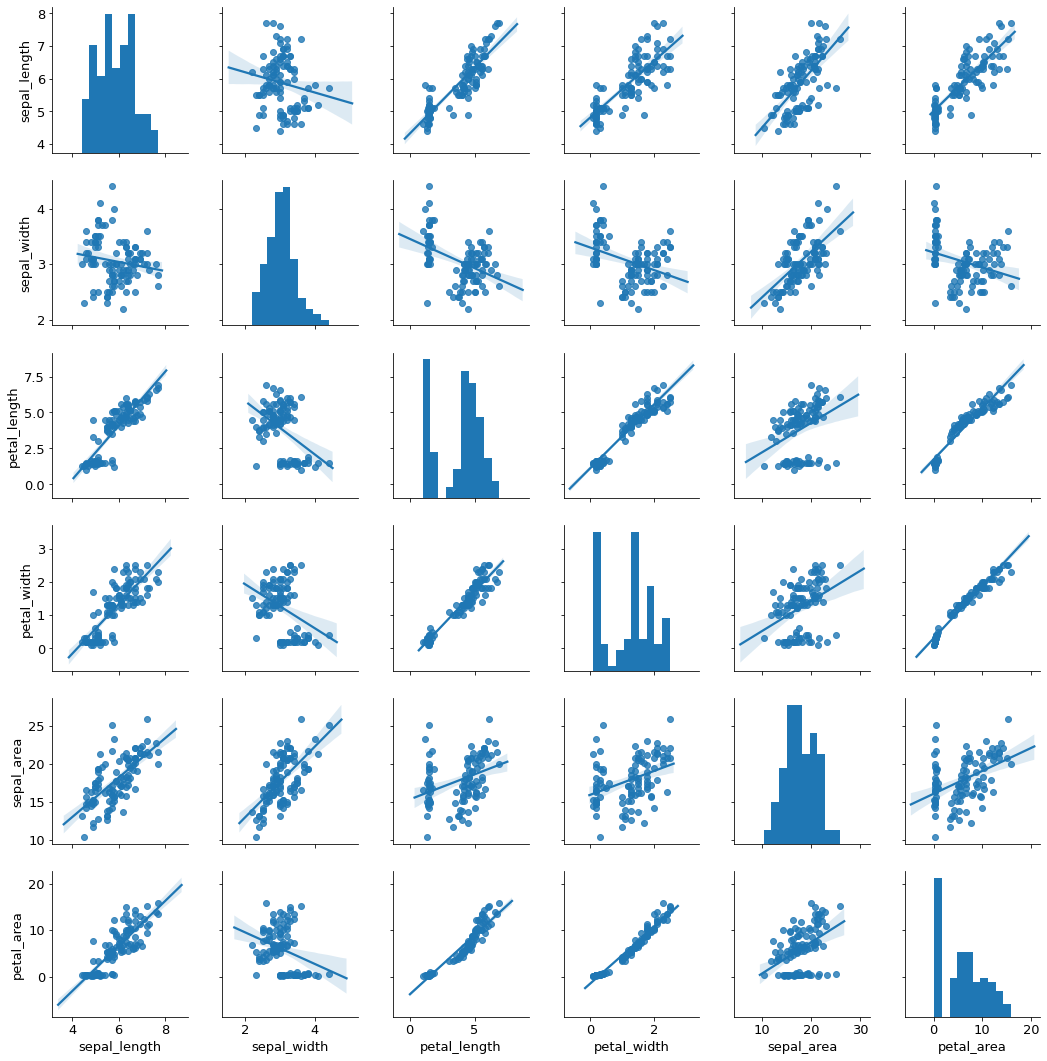

In [114]:
sns.pairplot(subset, kind = "reg")

6. Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

must include null hypothesis, alternative hypothesis, t-test, results, summary

$H_0$: the difference in sepal length between virginica and versicolor is insignificant.

$H_a$: the difference in sepal length between virginica and versicolor is substantial.

- We will test if the sepal length of virginica is significantly different than that of the versicolor.
- If there is difference, then variable sepal_length is a good choice to keep as a feature.
- We can use a t-test here, as sepal_length is somewhat normally distributed

In [117]:
from scipy import stats

In [122]:
alpha = .05

In [116]:
x1 = train[train.species_name == "virginica"].sepal_length

In [118]:
x2 = train[train.species_name == "versicolor"].sepal_length

In [120]:
t, p = stats.ttest_ind(x1, x2)

In [121]:
t

4.232219188580116

In [123]:
p

6.811720108343317e-05

In [126]:
if p < alpha:
    print("We reject the null hypothesis that the difference in sepal length between virginica and versicolor is insignificant")
else: 
    print("We fail to reject the null hypothesis")
    

We reject the null hypothesis that the difference in sepal length between virginica and versicolor is insignificant
